Montbrio model using Cupy

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from vbi.models.cupy.mpr_modified_bold import MPR_sde

In [2]:
seed = 2
np.random.seed(seed)

In [3]:
LABESSIZE = 10
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [4]:
nn = 6
weights = nx.to_numpy_array(nx.complete_graph(nn))
# weights = np.loadtxt('data/weights_68.txt')
# nn = weights.shape[0]

In [5]:
par = {
    "G": 0.33,              # global coupling strength
    "weights": weights,     # connection matrix
    "method": "heun",       # integration method
    "t_cut": 0,   # [ms]
    "dt": 0.01,
    "t_end": 30_000,        # [ms]
    "num_sim": 1,           # number of simulations
    "tr": 500.0,
    "engine": "cpu",        # cpu or gpu
    "seed": seed,           # seed for random number generator
    "RECORD_RV": True,
    "RECORD_BOLD": True,
}
obj = MPR_sde(par)
# print(obj())
sol = obj.run()

Integrating: 100%|██████████| 300000/300000 [00:35<00:00, 8446.12it/s]


In [6]:
rv_t = sol["rv_t"]
rv_d = sol["rv_d"]
fmri_d = sol["fmri_d"]
fmri_t = sol["fmri_t"]

In [7]:
print(f"rv_t.shape = {rv_t.shape}")
print(f"rv_d.shape = {rv_d.shape}")
print(f"fmri_d.shape = {fmri_d.shape}")
print(f"fmri_t.shape = {fmri_t.shape}")

rv_t.shape = (30000,)
rv_d.shape = (30000, 12, 1)
fmri_d.shape = (60, 6, 1)
fmri_t.shape = (60,)


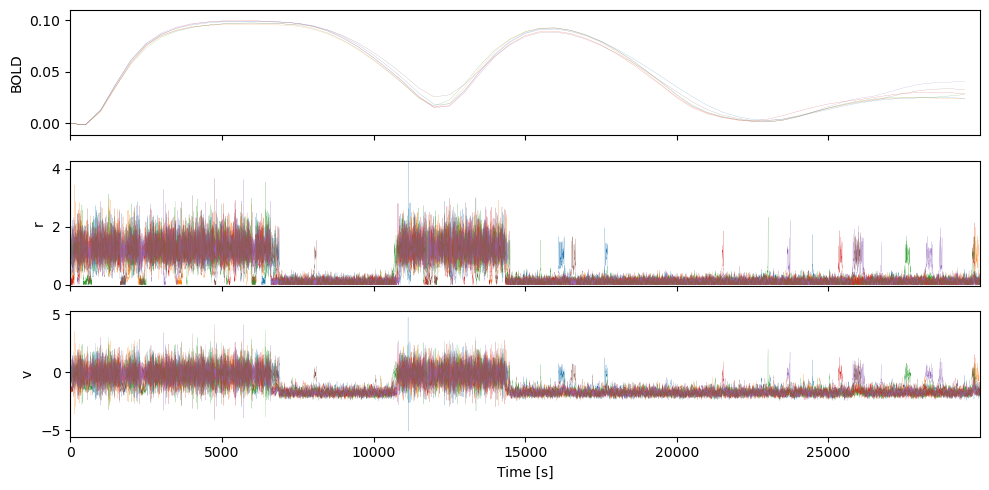

In [8]:
if fmri_d.ndim == 3:
    fig, ax = plt.subplots(3, figsize=(10, 5), sharex=True)
    ax[0].set_ylabel("BOLD")
    ax[0].plot(fmri_t, fmri_d[:,:,0], lw=0.1)
    ax[0].margins(0, 0.1)
    ax[1].plot(rv_t, rv_d[:, :nn, 0], lw=0.1)
    ax[2].plot(rv_t, rv_d[:, nn:, 0], lw=0.1)
    ax[1].set_ylabel("r")
    ax[2].set_ylabel("v")
    ax[2].set_xlabel("Time [s]")
    ax[1].margins(0, 0.01)
    plt.savefig("mpr.png")
    plt.tight_layout()
    plt.show()
